# Laboratorio 6
**Ciencias naturales y tecnología**

Solución de un problema aplicado usando el algoritmo de Grover

**Estudiante: Edgar Ronaldo Henao Villarreal**

## Contexto:

Catalina, una estudiante de Ingeniería de Sistemas se encuentra planeando su horario de clases. Las materias que puede ver son las siguientes:

- CALV
- AYED
- MATD
- CNYT
- CIPP

Sin embargo, Catalina necesita que su horario cumpla las siguientes condiciones de forma simultánea:

1. Si inscribe MATD, entonces también inscribirá CALV
2. Si inscribe AYED, entonces también inscribirá CNYT
3. Verá MATD o CIPP pero sólo una de las dos
4. No inscribirá CALV o no inscribirá AYED
5. No inscribirá CNYT o no inscribirá CIPP


## Ejercicio: 
Necesitas construir un oráculo que implemente las condiciones dadas y **dibujarlo**. Requerirás alambres para las incógnitas, alambres para las condiciones 1 a 5 y un alambre para la condición total. Finalmente debes usar el algoritmo de Grover (**dibuja el circuito de Grover**) para determinar el o los posibles horarios que puede hacer Catalina ejecutando tu circuito con ```shots=1000``` en el simulador. Debes mostrar tu histograma e interpretar las soluciones redactando en español cómo estaría o cómo estarían conformados los horarios que puede armar Catalina.

---

### Ayudas: 

Catalina te recuerda que: 

* La condición $p \rightarrow q$ es lógicamente equivalente a $\lnot p \lor q$.
* Si una condición es de la forma: 

$$\mathrm{variable}_0 \lor \mathrm{variable}_1$$ 

la puedes implementar de la siguiente manera:




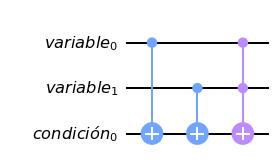

* Si una condición es de la forma: 

$$\mathrm{variable}_0 \lor \lnot \mathrm{variable}_1$$ 

la puedes implementar de la siguiente manera:

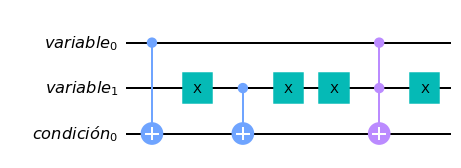

* Puedes generalizar estas ayudas para implementar tu oráculo, también puedes usar otras equivalencias lógicas que consideres convenientes.

* Sólo necesitarás implementar una iteración del algoritmo de Grover.

# Solución:

In [1]:
# Importación de librerías
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
%matplotlib inline
import numpy as np
def decimal_a_binario(n, k):
    '''
    Esta función recibe una longitud n y un entero k. Retorna una lista de longitud n tal que cada elemento
    es un dígito de la representación binaria de k.
    '''
    
    lista_binaria = []
    
    for i in reversed(range(n)):
        bit = k // 2**i
        k = k % 2**i
        lista_binaria.append(bit)
    
    return lista_binaria
def evaluar_oraculo_en_c(oraculo, c):
    
    
    tam = oraculo.num_qubits   # Tamaño o número de qubits que abarca el oráculo. No cambiar.
    
    ## Declaren el circuito cuántico con los parámetros adecuados:
    circuito = QuantumCircuit(len(c)+1, 1)      
    
    ## Inicialización
    ## Usen este ciclo for y un condicional if dentro del for para inicializar con el valor de c 
    ## los alambres superiores según los bits contenidos en la lista c. 
    for i in range(len(c)):
        circuito.x(i) if c[i] == 1 else None
            
    # Insertar circuito. No cambiar el segundo parámetro.
    circuito.append(oraculo, list(range(tam)))
    
    ## Medición
    ## Añadan la medición con los parámetros adecuados:
    circuito.measure(len(c), 0)
    
    ## Realización de la simulación con 1 shot 
    simulador = Aer.get_backend('qasm_simulator')
    conteos = execute(circuito, backend=simulador, shots=1).result().get_counts()
    valor_orac_en_c = int(list(conteos.keys())[0]) # No cambiar. Extrae del diccionario el estado medido
    
    ## Retornar lo solicitado en las indicaciones
    return valor_orac_en_c
def tabular_oraculo(oraculo):
    '''
    Esta función recibe como argumento una compuerta cuántica (oráculo) e imprime la tabulación de los valores
    de f para toda cadena en su dominio.
    '''
    n = oraculo.num_qubits - 1   # Determina la longitud de las cadenas de 0s y 1s en el conjunto de salida de f.
    
    ## Crear un print que escriba el título de la tabulación según lo pedido en las indicaciones
    
    print("Tabla de valores de la función f:{0, 1}^"+str(n)+" ---> {0, 1}")
    
    # Este ciclo for debe recorrer los enteros de 0 a 2^n - 1. Notemos que al pasar esos números 
    # a binario obtendremos todas las posibles cadenas de 0s y 1s de longitud n. 
    # (Desde 00...0 hasta 11...1)
     
    # Completar 
    for i in range(2**n):
        
        ## Completar con los parámetros adecuados para obtener una lista que contenga la 
        ## representación binaria del contador del ciclo.
        s = decimal_a_binario(n, i)
        
        ## La variable 'valor' debe corresponder al valor de f(s) y debe hallarse usando la 
        ## función del ejercicio anterior
        valor = evaluar_oraculo_en_c(oraculo, s)
        
        lista_a_cadena = ''.join([str(bit) for bit in s]) # Simplemente convierte la lista s a cadena para su
                                                          # uso en el print. No cambiar.
        
        ## Completar el print para que escriba la línea solicitada en las indicaciones.
        print("f({}) = {}".format(lista_a_cadena, valor))
       
    return

Antes de comenzar con la elaboracion del circuito, debemos tener en cuenta:

MATD -> 0

CALV -> 1

AYED -> 2

CNYT -> 3

CIPP -> 4

Las condiciones del problema expresadas en lógica proposicional son definidas como sigue:
(¬MATD v CALV) ^ (¬AYED v CNYT) ^ (MATD XOR CIPP) ^ ¬(CALV ^ AYED) ^ (CNYT ^ CIPP)

traducidas a nuestro circuito son:
(¬0 v 1) ^ (¬2 v 3) ^ (0 XOR 4) ^ ¬(1 ^ 2) ^ ¬(3 ^ 4), representadas las condiciones como sigue:

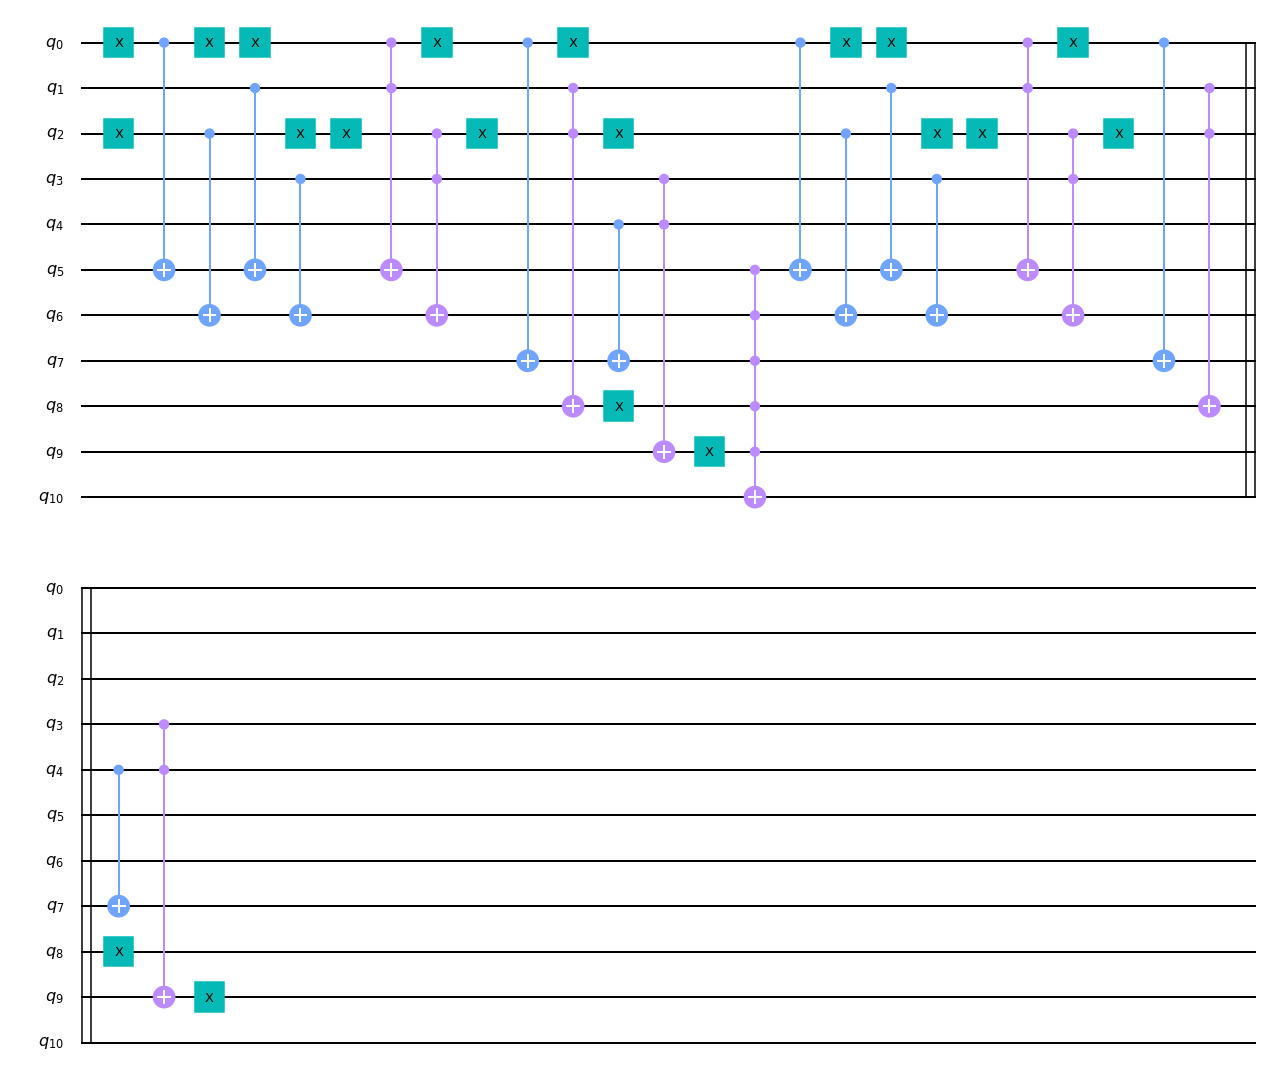

In [17]:
cq = QuantumCircuit(11)
#Primera condicion
cq.x(0)
cq.cx(0,5)
cq.x(0)
cq.cx(1,5)
cq.x(0)
cq.ccx(0,1,5)
cq.x(0)
#Segunda condicion
cq.x(2)
cq.cx(2,6)
cq.x(2)
cq.cx(3,6)
cq.x(2)
cq.ccx(2,3,6)
cq.x(2)
#Tercera condicion
cq.cx(0,7)
cq.cx(4,7)
#Cuarta condicion
cq.ccx(1,2,8)
cq.x(8)
#Quinta condicion
cq.ccx(3,4,9)
cq.x(9)
cq.mct([5,6,7,8,9],10)
#Deshacer
cq.x(0)
cq.cx(0,5)
cq.x(0)
cq.cx(1,5)
cq.x(0)
cq.ccx(0,1,5)
cq.x(0)
cq.x(2)
cq.cx(2,6)
cq.x(2)
cq.cx(3,6)
cq.x(2)
cq.ccx(2,3,6)
cq.x(2)
cq.cx(0,7)
cq.cx(4,7)
cq.ccx(1,2,8)
cq.x(8)
cq.ccx(3,4,9)
cq.x(9)
cq.draw('mpl')

In [18]:
lab = cq.to_gate()
lab.name = "laboratorio"

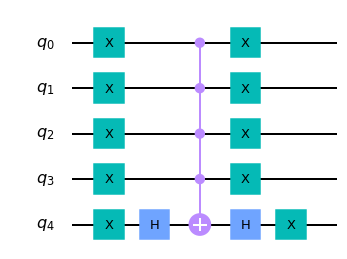

In [19]:
sq2 = QuantumCircuit(5)
sq2.x([0,1,2,3,4])

sq2.h(4)
sq2.mct([0,1,2,3],4)
sq2.h(4)

sq2.x([0,1,2,3,4])
sq2.draw('mpl')

In [20]:
difusion = sq2.to_gate()
difusion.name = "difusion"

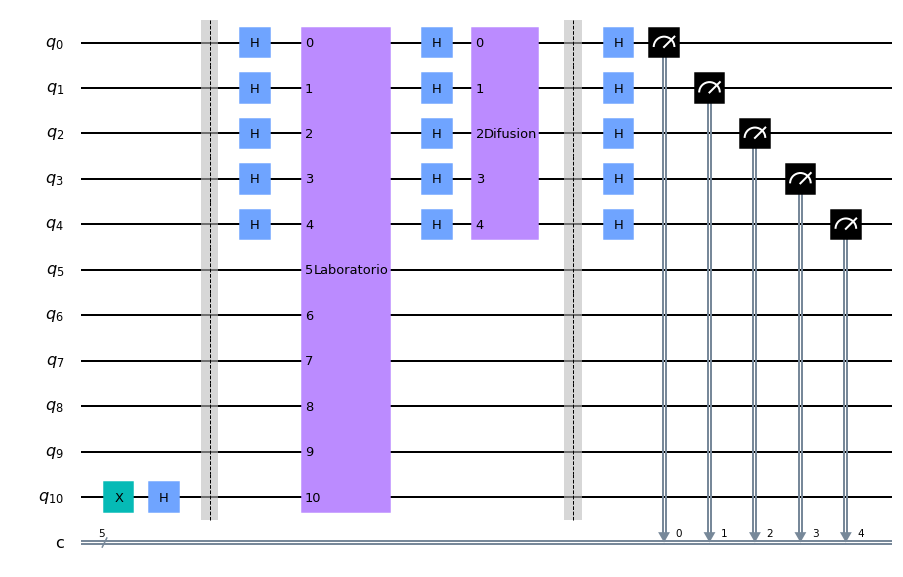

In [21]:
grover = QuantumCircuit(11, 5)
grover.x(10)
grover.h(10)
grover.barrier()
grover.h([0, 1, 2, 3,4])
##
for i in range(1):
    grover.append(lab, [0, 1, 2,3,4,5,6,7,8,9,10])
    grover.h([0, 1,2,3,4])
    grover.append(difusion, [0, 1,2,3,4])
    grover.barrier()
    grover.h([0, 1,2,3,4])
##



##
grover.measure([0, 1,2,3,4], [0, 1,2,3,4])
grover.draw('mpl')

In [26]:
simulador = Aer.get_backend('qasm_simulator')
conteos1 = execute(grover, backend=simulador, shots=1000).result().get_counts()
print(conteos1)

{'00000': 9, '00001': 8, '10000': 220, '10001': 5, '10010': 163, '10011': 8, '10100': 10, '10101': 8, '10110': 5, '10111': 8, '11000': 8, '11001': 7, '11010': 11, '11011': 3, '11100': 7, '11101': 4, '11110': 6, '11111': 4, '00010': 13, '00011': 201, '00100': 5, '00101': 7, '00110': 9, '00111': 10, '01000': 9, '01001': 9, '01010': 13, '01011': 201, '01100': 8, '01101': 6, '01110': 5, '01111': 10}


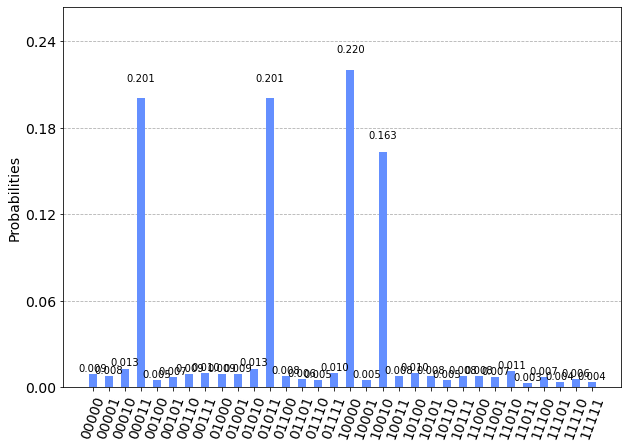

In [28]:
plot_histogram(conteos1,(10,7))

### Conclusiones
Las soluciones del presente problema propuesto por Catalina tienen sus soluciones en las cadenas de bits $10000$,$10010$,$00011$,$01011$ que representan a su vez que 

$10000$ seria $00001$ Catalina inscribe solo CIPP 

$10010$ seria $01001$ Catalina inscribe solo CIPP y CALV

$00011$ seria $11000$ Catalina inscribe solo MATD y CALV

$01011$ seria $11010$ Catalina inscribe MATD, CALV y CNYT.

Que representa apropiadamente las soluciones de acuerdo a las condiciones del problema propuesto